In [5]:
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import tensorflow as tf 
from keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img 

from IPython import display 
 

In [6]:
# Data loading 
train_gen = ImageDataGenerator(rescale = 1./255) 

train_data = train_gen.flow_from_directory('../input/satellite-image-classification/data', target_size = (224, 224), 
                                          batch_size = 32, class_mode = 'categorical', shuffle = True)

# test_data = train_gen.flow_from_directory('../input/intel-image-classification/seg_test/seg_test', target_size = (224, 224), 
#                                           batch_size = 1, shuffle = False)

Found 5631 images belonging to 4 classes.


In [8]:
# Transfer learning 
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input 

model = Sequential()
base_model = MobileNetV2(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)

2022-11-28 17:20:53.730118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 17:20:53.844722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 17:20:53.845588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 17:20:53.847121: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

9420800/9406464 [==============================] - 1s 0us/step


In [10]:
base_model.trainable = True  

for i in base_model.layers[:100]: 
    base_model.trainable = False
    
pool = GlobalAveragePooling2D()
mid_layer = Dense(100,activation = 'relu')
final_1 = Dense(4,activation = 'softmax')

model = Sequential([base_model, mid_layer,pool, final_1])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 7, 7, 100)         128100    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 404       
Total params: 2,386,488
Trainable params: 128,504
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')
model.fit(train_data,epochs = 30)

2022-11-28 17:21:04.886330: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-11-28 17:21:08.078230: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


176/176 [==============================] - 48s 228ms/step - loss: 0.1647 - accuracy: 0.9458
Epoch 2/30
176/176 [==============================] - 13s 71ms/step - loss: 0.0537 - accuracy: 0.9830
Epoch 3/30
176/176 [==============================] - 13s 76ms/step - loss: 0.0443 - accuracy: 0.9838
Epoch 4/30
176/176 [==============================] - 13s 76ms/step - loss: 0.0214 - accuracy: 0.9948
Epoch 5/30
176/176 [==============================] - 13s 74ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 6/30
176/176 [==============================] - 13s 73ms/step - loss: 0.0204 - accuracy: 0.9927
Epoch 7/30
176/176 [==============================] - 13s 76ms/step - loss: 0.0166 - accuracy: 0.9959
Epoch 8/30
176/176 [==============================] - 14s 79ms/step - loss: 0.0162 - accuracy: 0.9943
Epoch 9/30
176/176 [==============================] - 13s 75ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 10/30
176/176 [==============================] - 12s 67ms/step - loss: 0.0124 - accura

In [18]:
def predict_classes(link): 
    img = cv2.imread(link)
    img = cv2.resize(img,(224,224))
    img = img/255
    img = img.reshape(-1,224,224,3)    # -1 is  for reshaping basically 
    pred = np.round(model.predict(img)).argmax(axis = 1)
    dic = {0: 'cloudy', 1: 'desert', 2: 'green_area', 3: 'water'}
    print(dic.get(int(pred)))

water


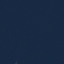

In [28]:
#Randomly selecting an image of water and predicting its label
link_water = '../input/satellite-image-classification/data/water/SeaLake_1.jpg' 
predict_classes(link_water)
load_img(link_water) 
 

desert


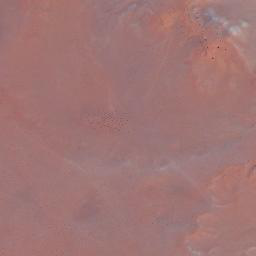

In [29]:
#Randomly selecting an image of desert and predicting its label
link_desert = '../input/satellite-image-classification/data/desert/desert(1).jpg'
predict_classes(link_desert)
load_img(link_desert) 

cloudy


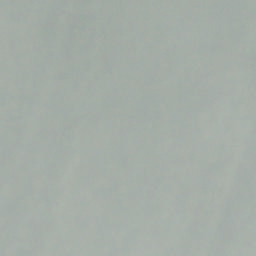

In [30]:
#Randomly selecting an image of clouds and predicting its label
link_cloud =  '../input/satellite-image-classification/data/cloudy/train_10043.jpg'
predict_classes(link_cloud)
load_img(link_cloud) 

green_area


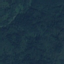

In [31]:
#Randomly selecting an image of green_area and predicting its label
link_green_area = '../input/satellite-image-classification/data/green_area/Forest_1464.jpg'
predict_classes(link_green_area)
load_img(link_green_area) 